# Churn Prediction Using Neural Networks

Imagine if you had the power to predict when your customers were on the verge of leaving your business—wouldn't that be invaluable knowledge? Armed with such insights, you could implement proactive strategies to prevent customer churn, ultimately enhancing customer retention rates and boosting your business's success.

Customer churn, often referred to as customer attrition or customer turnover, signifies the loss of customers over a specific period. Understanding the reasons behind customer churn is vital for businesses across industries. It not only helps identify pain points in customer experience but also provides an opportunity to implement targeted interventions aimed at retaining valuable customers.

By examining the Telecom Customer Churn dataset, we can uncover patterns and trends that shed light on the factors influencing customer churn. Through a captivating journey of storytelling and data exploration, we will uncover the hidden stories within this dataset, enabling us to make data-driven decisions to minimize customer churn and maximize customer satisfaction.

##### The Dataset

We will delve into the intriguing realm of customer churn analysis using a comprehensive dataset from Kaggle. The dataset we will be exploring is the Telecom Customer Churn dataset provided by Maven Analytics, which presents a valuable opportunity to gain insights into customer behavior and identify factors that contribute to customer attrition.

## 1. Loading Data

The Telecom Customer Churn dataset contains information on all 7,043 customers from a Telecommunications company in California during the second quarter of 2022. Each record in the dataset represents an individual customer and provides a range of details encompassing demographics, location, tenure, subscription services, and the customer's status for the quarter (i.e., joined, stayed, or churned).

### 1.1 Importing libraries and dataset

In [866]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
import xgboost as xgb
import numpy as np


In [867]:
df = pd.read_csv("telecom_customer_churn.csv")
print(df.head())


  Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charg

### 1.2 General overview of dataset 

In [868]:
print(df.describe())

               Age  Number of Dependents      Zip Code     Latitude  \
count  7043.000000           7043.000000   7043.000000  7043.000000   
mean     46.509726              0.468692  93486.070567    36.197455   
std      16.750352              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  92101.000000    33.990646   
50%      46.000000              0.000000  93518.000000    36.205465   
75%      60.000000              0.000000  95329.000000    38.161321   
max      80.000000              9.000000  96150.000000    41.962127   

         Longitude  Number of Referrals  Tenure in Months  \
count  7043.000000          7043.000000       7043.000000   
mean   -119.756684             1.951867         32.386767   
std       2.154425             3.001199         24.542061   
min    -124.301372             0.000000          1.000000   
25%    -121.788090             0.000000          9.0000

In [869]:
df['Avg Monthly Long Distance Charges'] = df['Avg Monthly Long Distance Charges'].astype(float)
df['Avg Monthly GB Download'] = df['Avg Monthly GB Download'].astype(float)


In [870]:
city_counts = df['City'].value_counts()
city_counts


Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Johannesburg          2
South Lake Tahoe      2
Jacumba               2
Holtville             2
Eldridge              2
Name: City, Length: 1106, dtype: int64

In [871]:
df = df[df["Customer Status"] != "Joined"]
df.loc[df["Customer Status"] == "Stayed", "Customer Status"] = 0
df.loc[df["Customer Status"] == "Churned", "Customer Status"] = 1


### 1.3 Splitting dataset

Splitting the dataset early in the notebook is crucial because it allows us to separate the data into distinct sets for training and testing. This division ensures that our analysis and model development processes are unbiased, as we can train models on one set and evaluate their effectiveness on a separate, unseen set. Such separation helps prevent overfitting and provides a more accurate assessment of the model's generalization capabilities.

In [872]:
X = df.drop(columns=["Customer Status","Churn Category","Churn Reason", "Customer ID"], axis=1)
y = df["Customer Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=37)


## 2. Data cleaning

### 2.1 Identifying and Handling Missing Values

Handling missing values is essential because they can introduce biases and inaccuracies in the analysis, potentially leading to erroneous conclusions. By properly addressing missing values, we ensure that our analysis is based on complete and reliable information, enabling more accurate insights and decision-making.

In [873]:
null_counts = X_train.isnull().sum()

print(null_counts)

Gender                                 0
Age                                    0
Married                                0
Number of Dependents                   0
City                                   0
Zip Code                               0
Latitude                               0
Longitude                              0
Number of Referrals                    0
Tenure in Months                       0
Offer                                  0
Phone Service                          0
Avg Monthly Long Distance Charges    434
Multiple Lines                       434
Internet Service                       0
Internet Type                        895
Avg Monthly GB Download              895
Online Security                      895
Online Backup                        895
Device Protection Plan               895
Premium Tech Support                 895
Streaming TV                         895
Streaming Movies                     895
Streaming Music                      895
Unlimited Data  

In [874]:
null_counts = X_test.isnull().sum()

print(null_counts)

Gender                                 0
Age                                    0
Married                                0
Number of Dependents                   0
City                                   0
Zip Code                               0
Latitude                               0
Longitude                              0
Number of Referrals                    0
Tenure in Months                       0
Offer                                  0
Phone Service                          0
Avg Monthly Long Distance Charges    210
Multiple Lines                       210
Internet Service                       0
Internet Type                        449
Avg Monthly GB Download              449
Online Security                      449
Online Backup                        449
Device Protection Plan               449
Premium Tech Support                 449
Streaming TV                         449
Streaming Movies                     449
Streaming Music                      449
Unlimited Data  

In this specific case, handling missing values involves recognizing that null values exist because not all customers subscribe to all services (such as internet or phone). These missing values can be addressed by explicitly indicating that the customers do not have those specific services, allowing for a more accurate representation of the data.

In [875]:

X_train['Avg Monthly GB Download'] = X_train['Avg Monthly GB Download'].fillna(0)
X_train["Avg Monthly Long Distance Charges"] = X_train["Avg Monthly Long Distance Charges"].fillna(0)


X_test['Avg Monthly GB Download'] = X_test['Avg Monthly GB Download'].fillna(0)
X_test["Avg Monthly Long Distance Charges"] = X_test["Avg Monthly Long Distance Charges"].fillna(0)


In [876]:
NoInternet=['Internet Type','Online Security','Online Backup','Device Protection Plan','Premium Tech Support','Streaming TV',
             'Streaming Movies','Streaming Music','Unlimited Data']
X_train[NoInternet]=X_train[NoInternet].fillna('No Internet Service')
X_test[NoInternet]=X_test[NoInternet].fillna('No Internet Service')

In [877]:
NoTelephone=["Multiple Lines"]
X_train[NoTelephone]=X_train[NoTelephone].fillna('No Phone Service')
X_test[NoTelephone]=X_test[NoTelephone].fillna('No Phone Service')

Once we handle those differences, we can see that there are no more null values!

In [878]:
null_counts = X_train.isnull().sum()

print(null_counts)

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                 

In [879]:
null_counts = X_test.isnull().sum()

print(null_counts)

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                 

In [880]:
X_train.head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
1264,Male,31,No,0,Valley Ford,94972,38.339996,-122.935056,0,21,...,No Internet Service,Month-to-Month,No,Credit Card,20.50,402.85,0.0,0,690.69,1093.54
1597,Male,37,No,0,Oakland,94609,37.834341,-122.264370,0,64,...,Yes,Two Year,Yes,Bank Withdrawal,104.40,6692.65,0.0,0,2932.48,9625.13
2114,Female,31,Yes,0,La Puente,91746,34.038983,-117.991372,1,48,...,Yes,One Year,No,Mailed Check,34.70,1604.50,0.0,0,0.00,1604.50
525,Female,49,Yes,1,Big Bear Lake,92315,34.242058,-116.898020,8,16,...,Yes,Month-to-Month,Yes,Bank Withdrawal,112.95,1882.55,0.0,0,743.20,2625.75
2233,Male,26,Yes,0,Santa Monica,90403,34.031529,-118.491156,4,68,...,Yes,Two Year,Yes,Bank Withdrawal,110.00,7611.85,0.0,0,1005.72,8617.57


### 2.2 Addressing Outliers

Addressing outliers is crucial because they can significantly impact the analysis and model performance. Outliers have the potential to distort statistical measures and introduce bias, leading to inaccurate conclusions. By properly identifying and addressing outliers, we ensure that our analysis is more robust, reliable, and representative of the underlying patterns in the data. This helps in obtaining more accurate insights and making informed decisions based on a more realistic understanding of the data distribution.

Isolation Forest is an anomaly detection algorithm that uses the concept of isolation to identify outliers. It constructs binary trees to isolate anomalies, leveraging the shorter average path length of anomalies to distinguish them from normal instances efficiently.

In [881]:
isolation_forest = IsolationForest(contamination = 0.05, max_samples = 100, random_state = 0)

# Separate the numerical and categorical features
numerical_features = X_train.select_dtypes(include=["int", "float"])

# DataFrame to store the outlier predictions
outlier_preds = pd.DataFrame()

# Iterate all numerical columns
for col in numerical_features:
    # Fit the Isolation Forest to the current column
    isolation_forest.fit(X_train[[col]])
    
    # Get the outlier predictions for the current column
    outlier_pred = isolation_forest.predict(X_train[[col]])
    
    # Add the outlier predictions as a new column in the outlier_preds DataFrame
    outlier_preds[col] = outlier_pred

outlier_preds



c:\Users\ximen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Users\ximen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Users\ximen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Users\ximen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Users\ximen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Users\ximen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have va

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,-1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,-1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4409,1,1,1,1,1,1,1,1,1,1,1,-1,1,1,1
4410,1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1
4411,1,1,1,1,1,1,1,-1,1,1,1,1,1,1,1
4412,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [882]:
# Reset indices of outlier_preds, X_test, and y_test
outlier_preds.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Filter X_test and y_test using the outlier predictions
outlier_mask = outlier_preds.eq(1).all(axis=1)
X_train = X_train.loc[outlier_mask]
y_train = y_train.loc[outlier_mask]

In [883]:
isolation_forest = IsolationForest(contamination = 0.05, max_samples = 100, random_state = 0)

# Separate the numerical and categorical features
numerical_features = X_test.select_dtypes(include=["int", "float"])

# DataFrame to store the outlier predictions
outlier_preds = pd.DataFrame()

# Iterate all numerical columns
for col in numerical_features:
    # Fit the Isolation Forest to the current column
    isolation_forest.fit(X_test[[col]])
    
    # Get the outlier predictions for the current column
    outlier_pred = isolation_forest.predict(X_test[[col]])
    
    # Add the outlier predictions as a new column in the outlier_preds DataFrame
    outlier_preds[col] = outlier_pred

# Reset indices of outlier_preds, X_test, and y_test
outlier_preds.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Filter X_test using the outlier predictions
outlier_mask = outlier_preds.eq(1).all(axis=1)
X_test = X_test.loc[outlier_mask]

# Filter y_test to match the number of rows in X_test_filtered
y_test = y_test.loc[outlier_mask]

c:\Users\ximen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Users\ximen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Users\ximen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Users\ximen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Users\ximen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
c:\Users\ximen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have va

### 2.3 Correlated Variables

Highly correlated variables can introduce multicollinearity issues in statistical analysis and machine learning models. Multicollinearity can lead to unstable model coefficients, reduced model interpretability, and inflated standard errors. By identifying and addressing correlated variables, we can improve the robustness and reliability of our analysis and models, ensuring that each variable contributes unique information and reducing the risk of making misleading or redundant conclusions.

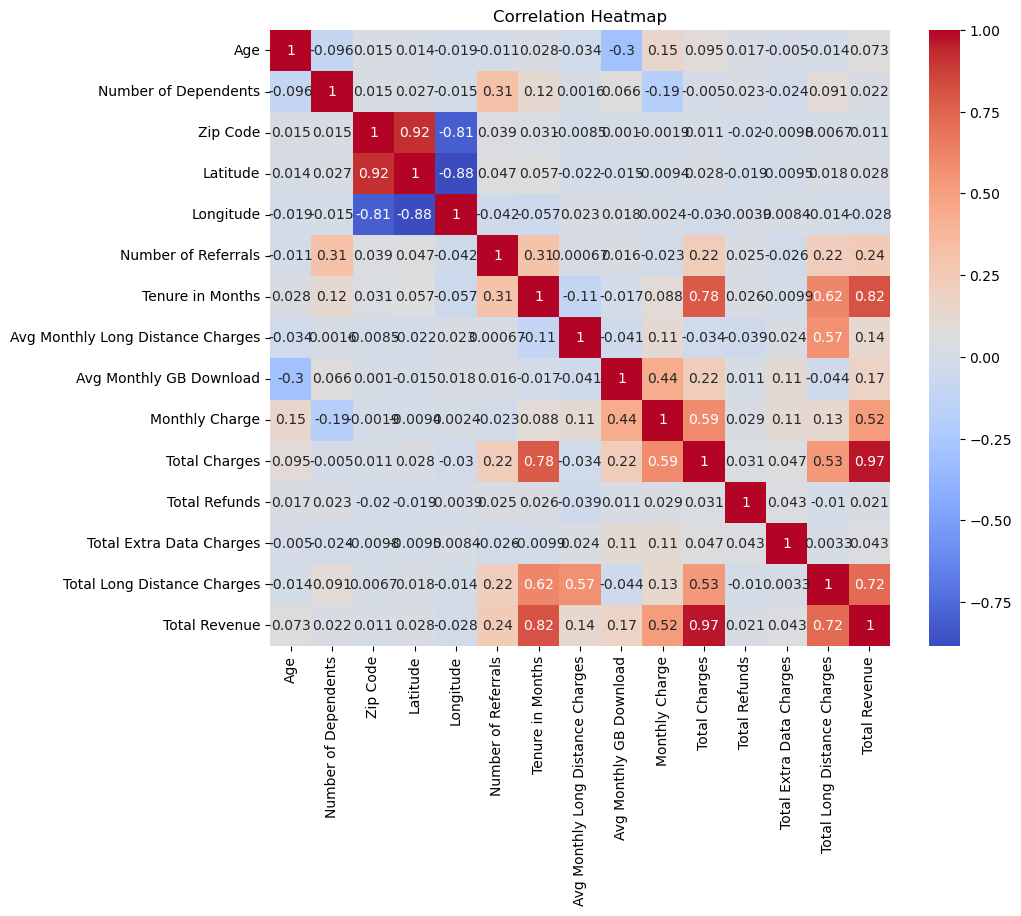

In [884]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = X_train.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [885]:

# Removing columns with potential multicollinearity
X_train = X_train.drop(['Latitude', 'Longitude', 'Total Charges'], axis=1)
X_test = X_test.drop(['Latitude', 'Longitude', 'Total Charges'], axis=1)

In [886]:
X_train.head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Number of Referrals,Tenure in Months,Offer,Phone Service,...,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,Male,31,No,0,Valley Ford,94972,0,21,Offer D,Yes,...,No Internet Service,No Internet Service,Month-to-Month,No,Credit Card,20.50,0.00,0,690.69,1093.54
2,Female,31,Yes,0,La Puente,91746,1,48,None,No,...,No,Yes,One Year,No,Mailed Check,34.70,0.00,0,0.00,1604.50
6,Male,59,No,0,Guinda,95637,0,1,None,Yes,...,No,Yes,Month-to-Month,Yes,Bank Withdrawal,79.55,0.00,0,4.04,83.59
7,Female,65,No,0,Biola,93606,0,46,None,Yes,...,Yes,Yes,One Year,Yes,Bank Withdrawal,110.00,0.00,0,109.02,4983.82
9,Male,55,No,3,Glendale,91202,0,25,None,Yes,...,No Internet Service,No Internet Service,Month-to-Month,No,Credit Card,20.80,21.81,0,76.75,515.14


### 2.4 Data Encoding

Data encoding refers to the process of converting categorical or textual data into a numerical representation that can be understood by machine learning algorithms, such as neural networks. In neural networks, data encoding is crucial because these models typically operate on numerical data and require all inputs to be in a consistent format.

In [887]:
categorical_features = X_train.select_dtypes(include=["object"])

# Get the number of categories for each feature
category_counts = categorical_features.nunique()

# Print the number of categories for each feature
print(category_counts)


Gender                      2
Married                     2
City                      855
Offer                       6
Phone Service               2
Multiple Lines              3
Internet Service            2
Internet Type               4
Online Security             3
Online Backup               3
Device Protection Plan      3
Premium Tech Support        3
Streaming TV                3
Streaming Movies            3
Streaming Music             3
Unlimited Data              3
Contract                    3
Paperless Billing           2
Payment Method              3
dtype: int64


In [888]:
# Replace binary categories
X_train['Gender'] = X_train['Gender'].replace('Male', 1).replace('Female',0)
X_train['Married'] = X_train['Married'].replace('Yes', 1).replace('No',0)
X_train['Internet Service'] = X_train['Internet Service'].replace('Yes', 1).replace('No',0)
X_train['Phone Service'] = X_train['Married'].replace('Yes', 1).replace('No',0)
X_train['Paperless Billing'] = X_train['Paperless Billing'].replace('Yes', 1).replace('No',0)


X_test['Gender'] = X_test['Gender'].replace('Male', 1).replace('Female',0)
X_test['Married'] = X_test['Married'].replace('Yes', 1).replace('No',0)
X_test['Internet Service'] = X_test['Internet Service'].replace('Yes', 1).replace('No',0)
X_test['Phone Service'] = X_test['Married'].replace('Yes', 1).replace('No',0)
X_test['Paperless Billing'] = X_test['Paperless Billing'].replace('Yes', 1).replace('No',0)


X_train = X_train.drop(['Gender'], axis=1)
X_test = X_test.drop(['Gender'], axis=1)

In [889]:

# Get the value counts of each category
value_counts = X_train['City'].value_counts()

# Identify the categories with less than 20 occurrences
categories_to_replace = value_counts[value_counts < 20].index

# Replace the categories with 'Other'
X_train.loc[X_train['City'].isin(categories_to_replace), 'City'] = 'Other'


In [890]:

# Get the value counts of each category
value_counts = X_test['City'].value_counts()

# Identify the categories with less than 20 occurrences
categories_to_replace = value_counts[value_counts < 20].index

# Replace the categories with 'Other'
X_test.loc[X_test['City'].isin(categories_to_replace), 'City'] = 'Other'


In [891]:
# Filter categorical features based on category counts
selected_features = category_counts[(category_counts >= 3)].index

# Apply one-hot encoding to selected features
one_hot_encoded = pd.get_dummies(X_train[selected_features])
X_train = X_train.drop(selected_features, axis=1)
X_train = pd.concat([X_train, one_hot_encoded], axis=1)

# Apply one-hot encoding to selected features
one_hot_encoded = pd.get_dummies(X_test[selected_features])
X_test = X_test.drop(selected_features, axis=1)
X_test = pd.concat([X_test, one_hot_encoded], axis=1)

# Print the encoded DataFrame
print(X_train.head())

   Age  Married  Number of Dependents  Zip Code  Number of Referrals  \
0   31        0                     0     94972                    0   
2   31        1                     0     91746                    1   
6   59        0                     0     95637                    0   
7   65        0                     0     93606                    0   
9   55        0                     3     91202                    0   

   Tenure in Months  Phone Service  Avg Monthly Long Distance Charges  \
0                21              0                              32.89   
2                48              1                               0.00   
6                 1              0                               4.04   
7                46              0                               2.37   
9                25              0                               3.07   

   Internet Service  Avg Monthly GB Download  ...  Streaming Music_Yes  \
0                 0                      0.0  ...     

In [892]:

# Get the column sets of X_train and X_test
train_columns = set(X_train.columns)
test_columns = set(X_test.columns)

# Find the columns in X_test that are not present in X_train
extra_columns =  train_columns - test_columns

# Print the columns in X_test that are not present in X_train
print("Columns in X_test that are not in X_train:")
for column in extra_columns:
    print(column)

# Remove the extra columns from X_test
X_train= X_train.drop(extra_columns, axis=1)

Columns in X_test that are not in X_train:
City_Fresno
City_San Francisco
City_Long Beach
City_Sacramento


In [893]:
print(X_test.shape)
print(X_train.shape)

(1198, 62)
(2504, 62)


In [894]:

object_columns = X_train.select_dtypes(include=['object']).columns

if len(object_columns) > 0:
    print("Object columns found:")
    print(object_columns)
else:
    print("No object columns found.")


No object columns found.


In [895]:

object_columns = X_test.select_dtypes(include=['object']).columns

if len(object_columns) > 0:
    print("Object columns found:")
    print(object_columns)
else:
    print("No object columns found.")


No object columns found.


### 2.5 Feature Engineering

A new feature was created to indicate whether a customer has both telephone and internet services. This feature helps capture the presence of both services for customers, enabling a better understanding of their subscription status and potentially revealing any patterns or trends associated with having both services.

In [896]:

X_train['Both Services'] = np.where(X_train['Internet Service'] == 1 & (X_train['Phone Service'] == 1), 1, 0)
X_test['Both Services'] = np.where(X_test['Internet Service'] == 1 & (X_test['Phone Service'] == 1), 1, 0)


### 2.6 Feature Scaling

Scaling variables in neural networks is important to ensure that features are on a similar scale, which helps in faster convergence during optimization. It prevents features with larger magnitudes from dominating the learning process, leading to more balanced and accurate model predictions. Scaling also improves the stability and effectiveness of activation functions in neural networks.

In [897]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### 2.6 Feature Selection

To perform feature selection, we will utilize XGBoost (Extreme Gradient Boosting), a powerful algorithm known for its feature importance estimation capabilities. The process will involve training an XGBoost model on the dataset and extracting the feature importance scores. Based on these scores, we can identify the most influential features and make informed decisions regarding feature inclusion or exclusion in our final model, enhancing its efficiency and interpretability.

In [898]:
xgb_model = xgb.XGBClassifier()


In [899]:
X_test_scaled.shape

(1198, 63)

In [900]:
X_test_scaled.shape
X_train_scaled.shape

(2504, 63)

In [901]:
y_test.shape

(1198,)

In [902]:
xgb_model.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [903]:
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
import pandas as pd

# Assuming you have X_train_scaled, y_train, X_test_scaled

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Fit the model on the training data
xgb_model.fit(X_train_scaled, y_train)

# Get feature importance scores
feature_importance = xgb_model.feature_importances_

# Convert X_train_scaled to a DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Print feature importance scores
for feature_name, importance_score in zip(X_train_scaled_df.columns, feature_importance):
    print(f"{feature_name}: {importance_score}")

# Select features based on importance
selector = SelectFromModel(xgb_model, prefit=True)
X_train_selected = selector.transform(X_train_scaled)



Age: 0.012777450494468212
Married: 0.011965367011725903
Number of Dependents: 0.05645457282662392
Zip Code: 0.009687782265245914
Number of Referrals: 0.03146226704120636
Tenure in Months: 0.041363272815942764
Phone Service: 0.0
Avg Monthly Long Distance Charges: 0.008455473929643631
Internet Service: 0.0
Avg Monthly GB Download: 0.008218133822083473
Paperless Billing: 0.00757010979577899
Monthly Charge: 0.018150998279452324
Total Refunds: 0.009420645423233509
Total Extra Data Charges: 0.018889164552092552
Total Long Distance Charges: 0.00923119019716978
Total Revenue: 0.011026052758097649
City_Other: 0.012907445430755615
City_San Diego: 0.031033826991915703
City_San Jose: 0.0033788469154387712
Offer_None: 0.009477919898927212
Offer_Offer A: 0.006535734515637159
Offer_Offer B: 0.004451333545148373
Offer_Offer C: 0.009893517009913921
Offer_Offer D: 0.005753500387072563
Offer_Offer E: 0.011817623861134052
Multiple Lines_No: 0.010530737228691578
Multiple Lines_No Phone Service: 0.0
Multipl

In [904]:
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
import pandas as pd

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Fit the model on the training data
xgb_model.fit(X_train_scaled, y_train)

# Get feature importance scores
feature_importance = xgb_model.feature_importances_

# Convert X_train_scaled to a DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Create a dictionary to store feature importance scores
importance_scores = {}

# Store feature importance scores in the dictionary
for feature_name, importance_score in zip(X_train_scaled_df.columns, feature_importance):
    importance_scores[feature_name] = importance_score

# Sort the feature importance scores in descending order
sorted_scores = sorted(importance_scores.items(), key=lambda x: x[1], reverse=True)

# Print feature importance scores in descending order
for feature_name, importance_score in sorted_scores:
    print(f"{feature_name}: {importance_score}")

# Select features based on importance
selector = SelectFromModel(xgb_model, prefit=True)
X_train_selected = selector.transform(X_train_scaled)

X_test_selected = selector.transform(X_test_scaled)

Contract_Month-to-Month: 0.2958556115627289
Number of Dependents: 0.05645457282662392
Premium Tech Support_No: 0.04384123906493187
Tenure in Months: 0.041363272815942764
Number of Referrals: 0.03146226704120636
City_San Diego: 0.031033826991915703
Streaming Music_Yes: 0.026687273755669594
Payment Method_Credit Card: 0.02195999212563038
Online Security_No: 0.02090967260301113
Contract_One Year: 0.020899789407849312
Streaming Movies_Yes: 0.020580068230628967
Contract_Two Year: 0.020558135583996773
Total Extra Data Charges: 0.018889164552092552
Monthly Charge: 0.018150998279452324
Device Protection Plan_Yes: 0.013659026473760605
Online Backup_Yes: 0.013032120652496815
City_Other: 0.012907445430755615
Age: 0.012777450494468212
Married: 0.011965367011725903
Device Protection Plan_No: 0.011858089827001095
Offer_Offer E: 0.011817623861134052
Payment Method_Mailed Check: 0.011326311156153679
Total Revenue: 0.011026052758097649
Online Backup_No: 0.010688108392059803
Streaming TV_No: 0.010598597

### 2.8 Balancing Dataset

Balancing the dataset is important because class imbalances can significantly impact the performance of machine learning models. When one class dominates the data, the model may become biased towards that class, leading to poor predictions for the minority class.


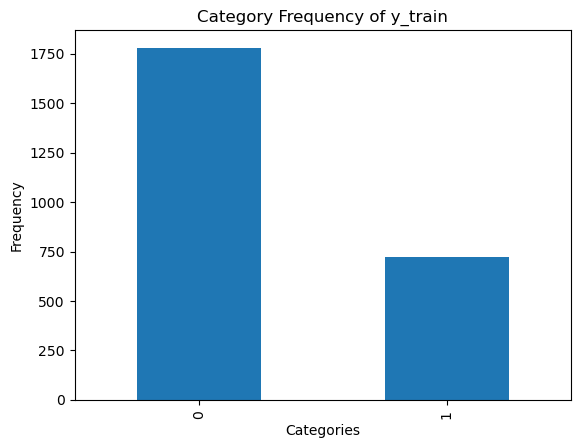

In [912]:
# Compute the category frequency
category_frequency = y_train_series.value_counts()

# Create a bar graph
category_frequency.plot(kind='bar')

# Set the labels and title
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Category Frequency of y_train')

# Display the plot
plt.show()


In [911]:
# Check data type of y_train
print(type(y_train))

# Inspect unique values in y_train
unique_labels = np.unique(y_train)
print(unique_labels)

<class 'pandas.core.series.Series'>
[0 1]


In [914]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)



[0 1 1 ... 1 0 1]


RandomOverSampler is a technique used to address class imbalance by randomly duplicating instances of the minority class until both classes are represented equally. This oversampling helps provide the model with sufficient examples from the minority class, allowing it to learn and generalize patterns effectively.

Balancing the dataset with RandomOverSampler ensures that the model receives adequate exposure to both classes, improving its ability to make accurate predictions for both majority and minority classes and reducing the risk of biased or skewed results.

In [915]:
ros = RandomOverSampler()
X_train_balanced, y_train_balanced = ros.fit_resample(X_train_selected, y_train_encoded)


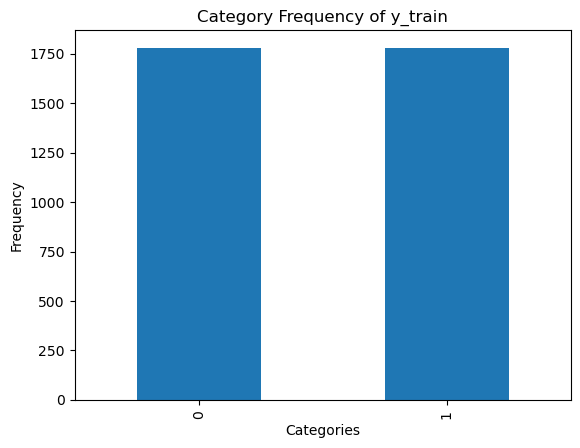

In [917]:
# Convert y_train to a pandas Series if it's not already
y_train_balanced_series = pd.Series(y_train_balanced)

# Compute the category frequency
category_frequency = y_train_balanced_series.value_counts()

# Create a bar graph
category_frequency.plot(kind='bar')

# Set the labels and title
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Category Frequency of y_train')

# Display the plot
plt.show()


## 3. Neural Network

Neural networks are a type of machine learning model inspired by the human brain's structure and function. They consist of interconnected layers of artificial neurons called nodes or units. Each node takes input, performs a computation, and produces an output that is passed to the next layer. Neural networks learn by adjusting the weights and biases associated with each connection to minimize the difference between predicted and actual outputs.

In this notebook, we will explore two approaches for optimizing neural networks: Adam and Momentum. 


### 3.1 Adam


Adam (Adaptive Moment Estimation) is an optimization algorithm that combines the benefits of both Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSProp). Adam dynamically adjusts the learning rate for each parameter, allowing for faster convergence and better handling of sparse gradients.


In [932]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train_balanced)
y_train_tensor = torch.Tensor(y_train_balanced)

# Reshape the target labels
y_train_tensor = y_train_tensor.view(-1, 1)

# Create a TensorDataset
dataset = TensorDataset(X_train_tensor, y_train_tensor)

# Define the neural network architecture
class ChurnPredictor(nn.Module):
    def __init__(self, input_size):
        super(ChurnPredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Create an instance of the model
model = ChurnPredictor(X_train_balanced.shape[1])

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# Create a DataLoader for batching
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        labels = labels.view(-1, 1)  # Reshape labels to match output shape
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


In [935]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set the model to evaluation mode
model.eval()

# Convert the test data to PyTorch tensors
X_test_tensor = torch.Tensor(X_test_selected)
y_test_tensor = torch.Tensor(y_test)

# Forward pass on the validation/test set
with torch.no_grad():
    val_outputs = model(X_test_tensor)

# Convert the predicted outputs to binary values (0 or 1)
val_predictions = torch.round(val_outputs)

# Convert the tensors to numpy arrays
val_predictions = val_predictions.numpy()
y_val_true = y_test_tensor.numpy()

# Compute the evaluation metrics
accuracy = accuracy_score(y_val_true, val_predictions)
precision = precision_score(y_val_true, val_predictions)
recall = recall_score(y_val_true, val_predictions)
f1 = f1_score(y_val_true, val_predictions)

# Print the evaluation metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))


Accuracy: 0.8214
Precision: 0.6810
Recall: 0.8048
F1 Score: 0.7377


In [944]:

from torch.utils.data import DataLoader, TensorDataset
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# Convert data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train_balanced)
y_train_tensor = torch.Tensor(y_train_balanced)

# Reshape the target labels
y_train_tensor = y_train_tensor.view(-1, 1)

# Create a TensorDataset
dataset = TensorDataset(X_train_tensor, y_train_tensor)

# Define the neural network architecture
class ChurnPredictor(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(ChurnPredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Custom wrapper class for PyTorch model
class PyTorchWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, input_size, hidden_size, lr=0.001, weight_decay=0.0):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.lr = lr
        self.weight_decay = weight_decay

    def fit(self, X, y):
        self.model = ChurnPredictor(self.input_size, self.hidden_size)
        criterion = nn.BCELoss()
        optimizer = optim.Adam(self.model.parameters(), lr=self.lr, weight_decay=self.weight_decay)

        X_tensor = torch.Tensor(X)
        y_tensor = torch.Tensor(y)
        y_tensor = y_tensor.view(-1, 1)
        dataset = TensorDataset(X_tensor, y_tensor)
        dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

        num_epochs = 10
        for epoch in range(num_epochs):
            for inputs, labels in dataloader:
                optimizer.zero_grad()
                outputs = self.model(inputs)
                labels = labels.view(-1, 1)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

    def predict(self, X):
        X_tensor = torch.Tensor(X)
        outputs = self.model(X_tensor)
        return (outputs >= 0.5).squeeze().detach().numpy().astype(int)

    def get_params(self, deep=True):
        return {
            'input_size': self.input_size,
            'hidden_size': self.hidden_size,
            'lr': self.lr,
            'weight_decay': self.weight_decay
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

# Define the parameter grid for grid search
param_grid = {
    'hidden_size': [32, 64, 128],
    'lr': [0.001, 0.01, 0.1],
    'weight_decay': [0.001, 0.01, 0.1]
}

# Create a scorer for the evaluation metric
scorer = make_scorer(accuracy_score)

# Create an instance of the wrapper class
model_wrapper = PyTorchWrapper(input_size=X_train_balanced.shape[1], hidden_size=64)

# Perform grid search using cross-validation
grid_search = GridSearchCV(model_wrapper, param_grid, scoring=scorer, cv=3, refit=False)
grid_search.fit(X_train_balanced, y_train_balanced)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'hidden_size': 128, 'lr': 0.01, 'weight_decay': 0.001}
Best score: 0.8314578062038961


In [950]:
# Define the neural network architecture
class ChurnPredictor(nn.Module):
    def __init__(self, input_size):
        super(ChurnPredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Convert data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train_balanced)
y_train_tensor = torch.Tensor(y_train_balanced)

# Reshape the target labels
y_train_tensor = y_train_tensor.view(-1, 1)

# Create an instance of the model
model = ChurnPredictor(X_train_balanced.shape[1])

# Define loss function and optimizer
criterion = nn.BCELoss()

# Define the learning rate and weight decay
learning_rate = 0.01
weight_decay = 0.001

# Create the Adam optimizer and adjust parameters
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    labels = y_train_tensor.view(-1, 1)  # Reshape labels to match output shape
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()


In [951]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set the model to evaluation mode
model.eval()

# Convert the test data to PyTorch tensors
X_test_tensor = torch.Tensor(X_test_selected)
y_test_tensor = torch.Tensor(y_test)

# Forward pass on the validation/test set
with torch.no_grad():
    val_outputs = model(X_test_tensor)

# Convert the predicted outputs to binary values (0 or 1)
val_predictions = torch.round(val_outputs)

# Convert the tensors to numpy arrays
val_predictions = val_predictions.numpy()
y_val_true = y_test_tensor.numpy()

# Compute the evaluation metrics
accuracy = accuracy_score(y_val_true, val_predictions)
precision = precision_score(y_val_true, val_predictions)
recall = recall_score(y_val_true, val_predictions)
f1 = f1_score(y_val_true, val_predictions)

# Print the evaluation metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))


Accuracy: 0.8105
Precision: 0.6522
Recall: 0.8422
F1 Score: 0.7351


### 3.2 Momentum


Momentum, on the other hand, is an optimization technique that enhances the traditional gradient descent algorithm. It introduces a momentum term that accelerates learning by accumulating gradients from previous iterations and guiding the optimization process towards the optimal direction. This helps overcome local minima and converges faster.


In [936]:

# Convert data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train_balanced)
y_train_tensor = torch.Tensor(y_train_balanced)

# Reshape the target labels
y_train_tensor = y_train_tensor.view(-1, 1)

# Create a TensorDataset
dataset = TensorDataset(X_train_tensor, y_train_tensor)

# Define the neural network architecture
class ChurnPredictor(nn.Module):
    def __init__(self, input_size):
        super(ChurnPredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Create an instance of the model
model = ChurnPredictor(X_train_balanced.shape[1])

# Define loss function and optimizer with momentum
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Create a DataLoader for batching
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        labels = labels.view(-1, 1)  # Reshape labels to match output shape
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


In [937]:
# Set the model to evaluation mode
model.eval()

# Convert the test data to PyTorch tensors
X_test_tensor = torch.Tensor(X_test_selected)
y_test_tensor = torch.Tensor(y_test)

# Reshape the target labels
y_test_tensor = y_test_tensor.view(-1, 1)

# Forward pass on the test set
with torch.no_grad():
    test_outputs = model(X_test_tensor)

# Convert the predicted outputs to binary values (0 or 1)
test_predictions = torch.round(test_outputs).numpy()

# Convert the tensors to numpy arrays
y_test_true = y_test_tensor.numpy()

# Compute the evaluation metrics
accuracy = accuracy_score(y_test_true, test_predictions)
precision = precision_score(y_test_true, test_predictions)
recall = recall_score(y_test_true, test_predictions)
f1 = f1_score(y_test_true, test_predictions)

# Print the evaluation metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))


Accuracy: 0.8022
Precision: 0.6351
Recall: 0.8610
F1 Score: 0.7310


In [956]:
# Convert data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train_balanced)
y_train_tensor = torch.Tensor(y_train_balanced)

# Reshape the target labels
y_train_tensor = y_train_tensor.view(-1, 1)

# Create a TensorDataset
dataset = TensorDataset(X_train_tensor, y_train_tensor)

# Define the neural network architecture
class ChurnPredictor(nn.Module):
    def __init__(self, input_size):
        super(ChurnPredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Create an instance of the model
model = ChurnPredictor(X_train_balanced.shape[1])

# Define loss function and optimizer with momentum
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.95)

# Create a DataLoader for batching
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        labels = labels.view(-1, 1)  # Reshape labels to match output shape
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


In [957]:

# Set the model to evaluation mode
model.eval()

# Convert the test data to PyTorch tensors
X_test_tensor = torch.Tensor(X_test_selected)
y_test_tensor = torch.Tensor(y_test)

# Reshape the target labels
y_test_tensor = y_test_tensor.view(-1, 1)

# Forward pass on the test set
with torch.no_grad():
    test_outputs = model(X_test_tensor)

# Convert the predicted outputs to binary values (0 or 1)
test_predictions = torch.round(test_outputs).numpy()

# Convert the tensors to numpy arrays
y_test_true = y_test_tensor.numpy()

# Compute the evaluation metrics
accuracy = accuracy_score(y_test_true, test_predictions)
precision = precision_score(y_test_true, test_predictions)
recall = recall_score(y_test_true, test_predictions)
f1 = f1_score(y_test_true, test_predictions)

# Print the evaluation metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))


Accuracy: 0.8139
Precision: 0.6557
Recall: 0.8503
F1 Score: 0.7404



By experimenting with both Adam and Momentum optimization techniques, we can evaluate their impact on the neural network's training and performance, gaining insights into their respective strengths and limitations in our specific analysis.

Overall, Model 2 Momentum performs the best in terms of accuracy, while Model 1 Adam has the highest
precision. Model 2 Adam Fine Tuning has the highest recall, and Model 2 Momentum has the highest F1
score. It's important to consider the specific requirements of your task when choosing the model based
on these performance metrics.